## <span style='color:red '>8.0 Importing required libraries</span>

In [1]:
### Pandas and Numpy
import pandas as pd
import numpy as np

### Visualisation libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### For Q-Q Plot
import scipy.stats as stats

### To ignore warnings
import warnings
warnings.filterwarnings('ignore')

### Machine Learning libraries
import sklearn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from category_encoders.binary import BinaryEncoder
from sklearn.compose import ColumnTransformer
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, ExtraTreesClassifier, VotingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score

### To be able to see maximum columns on screen
pd.set_option('display.max_columns', 500)

## <span style='color:red '>9.0 Importing dataset</span>

In [2]:
dataset=pd.read_csv('data_mongodb_import.csv')
dataset.drop('Unnamed: 0', axis=1, inplace=True)
dataset.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,39,other,77516,Bachelors,13,Never_married,Adm_clerical,Not_in_family,White,Male,2174,0,40,United_States,0
1,50,other,83311,Bachelors,13,Married_civ_spouse,Exec_managerial,Husband,White,Male,0,0,13,United_States,0
2,38,Private,215646,HS_grad,9,Divorced,other,Not_in_family,White,Male,0,0,40,United_States,0
3,53,Private,234721,other,7,Married_civ_spouse,other,Husband,other,Male,0,0,40,United_States,0
4,28,Private,338409,Bachelors,13,Married_civ_spouse,Prof_specialty,other,other,Female,0,0,40,other,0


### <span style='color:red '>9.1 Handeling Missing Values</span>

In [3]:
continuous_feature =[feature for feature in dataset.columns if dataset[feature].dtypes=='O']
print(continuous_feature)

['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country']


In [4]:
for feature in continuous_feature:
    print("{}, {}".format(feature, dataset[feature].nunique()))

workclass, 2
education, 4
marital_status, 4
occupation, 7
relationship, 5
race, 2
sex, 2
native_country, 2


In [5]:
### Function to Cap Outlier
def remove_outliers(in_data, in_col):
    # Finding the IQR
    first_quartile = in_data[in_col].quantile(0.25)
    third_quartile = in_data[in_col].quantile(0.75)
    iqr = third_quartile - first_quartile
    upper_limit = third_quartile + 1.5 * iqr
    lower_limit = first_quartile - 1.5 * iqr
    in_data.loc[(in_data[in_col]>upper_limit), in_col]= upper_limit
    in_data.loc[(in_data[in_col]<lower_limit), in_col]= lower_limit    
    return in_data

In [6]:
### getting list of continuous features
continuous_features=[feature for feature in [feature for feature in dataset.columns if dataset[feature].dtypes!='O'] if len(dataset[feature].unique())>25]
continuous_features

['age', 'fnlwgt', 'capital_gain', 'capital_loss', 'hours_per_week']

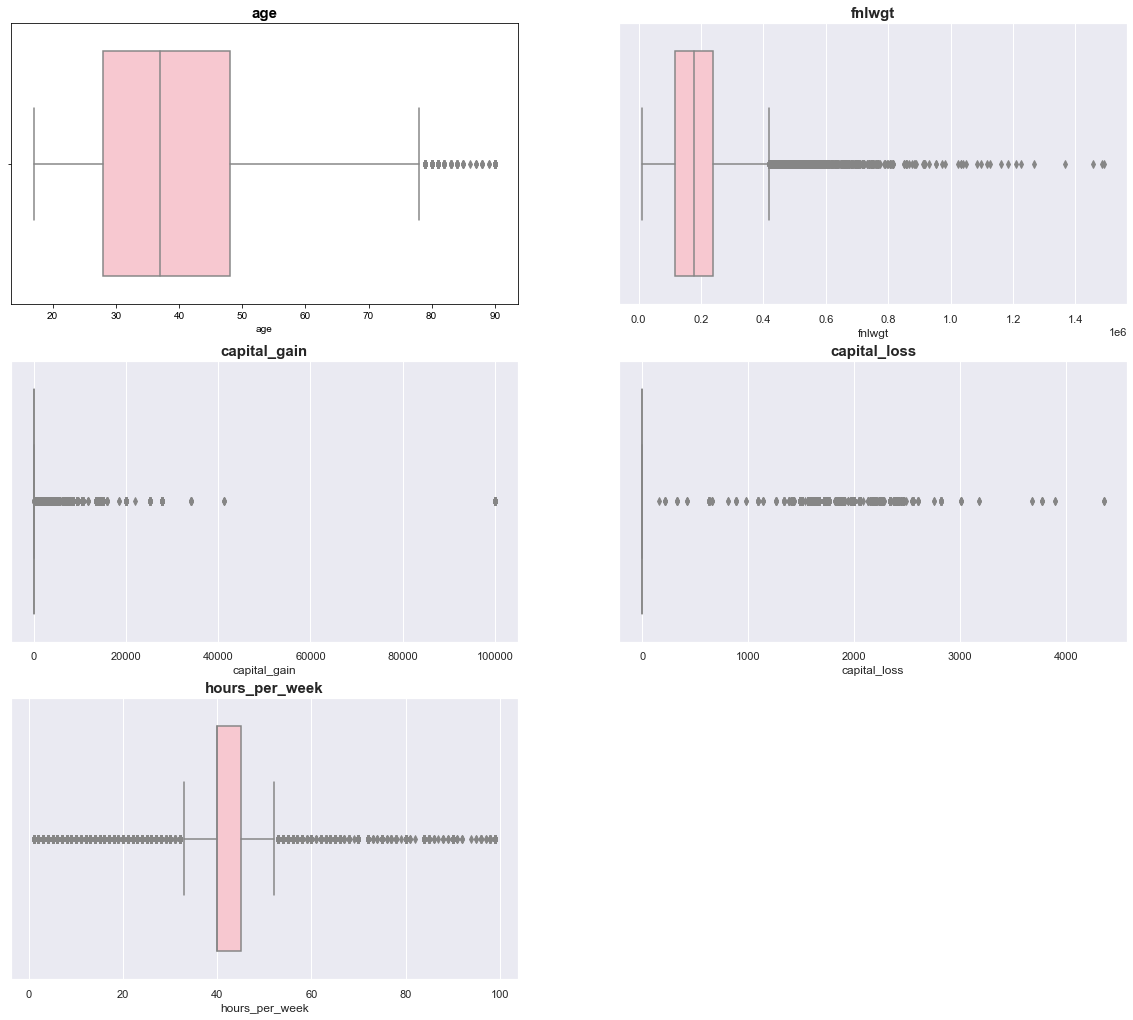

In [7]:
### Checking outliers in numerical features

plt.figure(figsize=(20,30))
for feature in enumerate(continuous_features):
    plt.subplot(5, 2, feature[0]+1)
    sns.set(rc={'figure.figsize':(10,6)})
    sns.boxplot(data=dataset, x=feature[1], color='pink')
    plt.title("{}".format(feature[1]), fontweight="bold", fontsize=15)

In [8]:
### Capping outliers from continuous features
for feature in continuous_features:
    dataset=remove_outliers(dataset, feature)

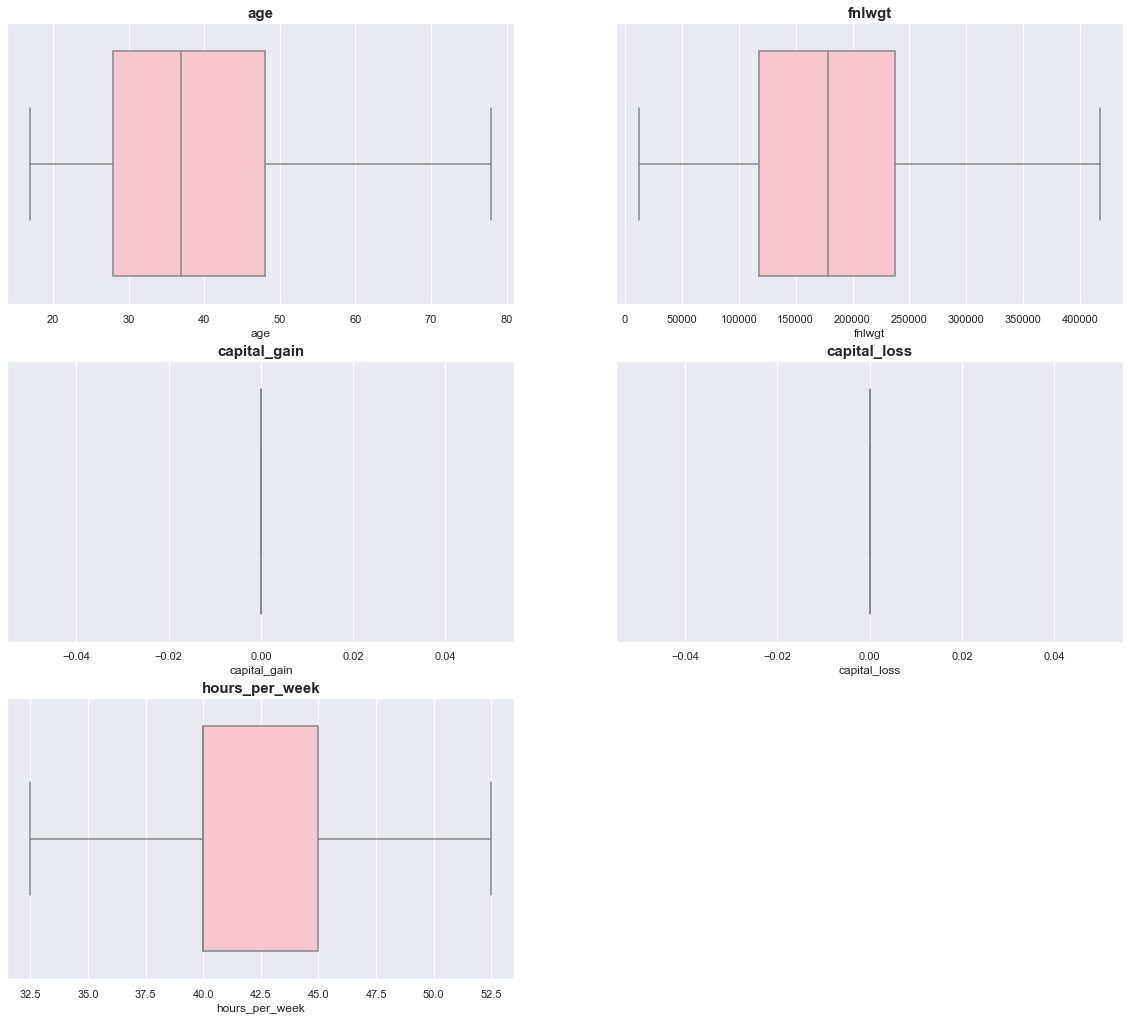

In [9]:
### Checking outliers in numerical features

plt.figure(figsize=(20,30))
for feature in enumerate(continuous_features):
    plt.subplot(5, 2, feature[0]+1)
    sns.set(rc={'figure.figsize':(10,6)})
    sns.boxplot(data=dataset, x=feature[1], color='pink')
    plt.title("{}".format(feature[1]), fontweight="bold", fontsize=15)

## <span style='color:red '>10.0 Model and Evaluation</span>

### <span style='color:red '>10.1 Seperating Independent and Dependent features</span>

In [11]:
### Splitting data into independent feature dataframe and dependent feature series
X=dataset.iloc[:,:-1]
y=dataset.iloc[:,-1]
X.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,39,other,77516.0,Bachelors,13,Never_married,Adm_clerical,Not_in_family,White,Male,0,0,40.0,United_States
1,50,other,83311.0,Bachelors,13,Married_civ_spouse,Exec_managerial,Husband,White,Male,0,0,32.5,United_States
2,38,Private,215646.0,HS_grad,9,Divorced,other,Not_in_family,White,Male,0,0,40.0,United_States
3,53,Private,234721.0,other,7,Married_civ_spouse,other,Husband,other,Male,0,0,40.0,United_States
4,28,Private,338409.0,Bachelors,13,Married_civ_spouse,Prof_specialty,other,other,Female,0,0,40.0,other


In [12]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: salary, dtype: int64

### <span style='color:red '>10.2 Train Test Split</span>

In [13]:
### random state train test split will be same with all people using random_state=19

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=19)
X_train.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
34576,33,Private,156383.0,Bachelors,13,Married_civ_spouse,Adm_clerical,other,White,Female,0,0,40.0,United_States
33148,29,Private,293073.0,other,15,Married_civ_spouse,Prof_specialty,Husband,White,Male,0,0,48.0,United_States
2109,66,Private,146454.0,Some_college,10,Married_civ_spouse,Sales,Husband,White,Male,0,0,40.0,United_States
33501,19,Private,260265.0,HS_grad,9,Never_married,Adm_clerical,Own_child,White,Male,0,0,50.0,United_States
47110,23,Private,86939.0,HS_grad,9,Divorced,other,Not_in_family,White,Male,0,0,50.0,United_States


In [14]:
y_train.head()

34576    0
33148    1
2109     1
33501    0
47110    0
Name: salary, dtype: int64

In [15]:
X_test.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
3436,38,Private,220585.0,HS_grad,9,Married_civ_spouse,Craft_repair,Husband,White,Male,0,0,40.0,United_States
16332,38,other,37778.0,HS_grad,9,Never_married,other,Not_in_family,White,Male,0,0,52.5,United_States
39798,58,other,127539.0,other,6,Married_civ_spouse,Craft_repair,Husband,White,Male,0,0,32.5,United_States
12405,17,Private,216137.0,other,7,Never_married,Sales,Own_child,White,Female,0,0,32.5,United_States
7584,18,Private,115630.0,other,7,Never_married,Adm_clerical,Own_child,other,Male,0,0,32.5,United_States


In [16]:
y_test.head()

3436     0
16332    0
39798    0
12405    0
7584     0
Name: salary, dtype: int64

In [17]:
### both will have same shape
X_train.shape, y_train.shape

((36609, 14), (36609,))

In [18]:
### both will have same shape
X_test.shape, y_test.shape

((12204, 14), (12204,))

### <span style='color:red '>10.3 Feature Transformation</span>

In [19]:
### encoding categorical features

In [20]:
### creating list of features for scaling and encoding
numerical_features=[feature for feature in dataset.columns if dataset[feature].dtypes != 'O' and feature not in ['salary']]
print(numerical_features)
onehot_enc_col= ['workclass', 'race', 'sex', 'native_country']
print(onehot_enc_col)
binary_enc_col= ['education', 'marital_status', 'occupation', 'relationship']
print(binary_enc_col)### for unique categories equal or more than 4

['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']
['workclass', 'race', 'sex', 'native_country']
['education', 'marital_status', 'occupation', 'relationship']


In [21]:
### Standard scalar Object for feature scaling
scalar = StandardScaler()

### one hot encoder object for 2 or 3 categories at max
onehot_enc = OneHotEncoder()

### using binary encoder for car_name feature as this has many categories
binary_enc = BinaryEncoder()

### Creating column transformer to implement above objects
column_transformer = ColumnTransformer(
    [
        ("OneHotEncoder", onehot_enc, onehot_enc_col),
         ("StandardScaler", scalar, numerical_features),
        ("BinaryEncoder", binary_enc, binary_enc_col)
        
    ]
)

In [22]:
X_train=column_transformer.fit_transform(X_train)
X_train

array([[1., 0., 1., ..., 0., 0., 1.],
       [1., 0., 1., ..., 0., 1., 0.],
       [1., 0., 1., ..., 0., 1., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 1., 0., 1.],
       [1., 0., 1., ..., 0., 1., 1.]])

In [23]:
X_test=column_transformer.transform(X_test)
X_test

array([[1., 0., 1., ..., 0., 1., 0.],
       [0., 1., 1., ..., 1., 0., 0.],
       [0., 1., 1., ..., 0., 1., 0.],
       ...,
       [1., 0., 0., ..., 1., 0., 1.],
       [0., 1., 1., ..., 1., 0., 0.],
       [1., 0., 1., ..., 0., 1., 1.]])

### <span style='color:red '>10.4 Model training and performance</span>

In [24]:
### Creating function that will evaluate model
def model_evaluator(actual_val, pred_val):
    """
    The function takes actual value and predicted value as argument 
    and returns Accuracy, Precision, Recall, F-1 Score rounded to 
    3 decimal places.
    """
    acc=round(accuracy_score(actual_val, pred_val),3)
    prec=round(precision_score(actual_val, pred_val),3)
    rec=round(recall_score(actual_val, pred_val),3) 
    roc_auc=round(roc_auc_score(actual_val, pred_val),3)
    return acc, prec, rec, roc_auc

In [25]:
### creating dictionary containing model objects for different algorithmn
models={
    "Logistic Regression":LogisticRegression(),
    "Support Vector Classifier":SVC(),
    "Decision Tree Classifier":DecisionTreeClassifier(),
    "Random Forest Classifier":RandomForestClassifier(),
    "Bagging Classifier": BaggingClassifier(base_estimator=LogisticRegression()),
    "Extra Tree Classifier": ExtraTreesClassifier(),
    "AdaBoost Classifier": AdaBoostClassifier(),
    "GradientBoost Classifier": GradientBoostingClassifier(),
    "XGBoost Classifier": XGBClassifier()
}

In [26]:
### Creating function for model training
def model_trainer(model, X_train_data, y_train_data, X_test_data):
    """
    This function takes model object, X train data, y train data, and 
    X test data as argument, trains model and gives prediction for train data 
    and prediction for test data.
    """
    model.fit(X_train_data, y_train_data)
    y_train_pred=model.predict(X_train_data)
    pred_val=model.predict(X_test_data)
    return y_train_pred, pred_val

In [27]:
### Creating empty list to store model names
model_list=[]
### creating empty list to store accuracy score for each model
acc_score_list=[]
### creating empty list for storing precision score
prec_score_list=[]
### creating list to store recall score
recall_list=[]
### creating list to store roc_auc score
roc_auc_list=[]

In [28]:
### Training all models and getting their performance and storing it in empty list
for num in range(len(list(models))):
    ### selecting model
    model=list(models.values())[num]
    
    ### getting training data prediction and test data prediction
    y_pred, pred_val=model_trainer(model,X_train, y_train, X_test)
    
    ### Getting model performance parameters for training data
    acc_score, prec_score, rec_score, roc_auc=model_evaluator(y_train,y_pred )
    print("{} Model\n".format(list(models.keys())[num]))
    print("Model Performance for training dataset")
    print("Accuracy score: {}\nPrecision Score: {}\nRecall Score: {}\nRoc_Auc Score: {}".format(acc_score,prec_score, rec_score, roc_auc))
    print("-"*50)
    
    ### Getting model performance parameters for test data
    acc_score, prec_score, rec_score, roc_auc=model_evaluator(y_test,pred_val)
    print("Model Performance for Test dataset")
    print("Accuracy score: {}\nPrecision Score: {}\nRecall Score: {}\nRoc_Auc Score: {}".format(acc_score,prec_score, rec_score, roc_auc))
    
    ### Appending model name and Performance score in seperate list so that models can be sorted in terms of performance
    model_list.append(list(models.keys())[num])
    acc_score_list.append(acc_score)
    prec_score_list.append(prec_score)
    recall_list.append(rec_score)
    roc_auc_list.append(roc_auc)
    print("*"*50)
    print("\n")

Logistic Regression Model

Model Performance for training dataset
Accuracy score: 0.827
Precision Score: 0.68
Recall Score: 0.531
Roc_Auc Score: 0.726
--------------------------------------------------
Model Performance for Test dataset
Accuracy score: 0.824
Precision Score: 0.665
Recall Score: 0.519
Roc_Auc Score: 0.719
**************************************************


Support Vector Classifier Model

Model Performance for training dataset
Accuracy score: 0.837
Precision Score: 0.717
Recall Score: 0.53
Roc_Auc Score: 0.732
--------------------------------------------------
Model Performance for Test dataset
Accuracy score: 0.833
Precision Score: 0.701
Recall Score: 0.511
Roc_Auc Score: 0.722
**************************************************


Decision Tree Classifier Model

Model Performance for training dataset
Accuracy score: 1.0
Precision Score: 1.0
Recall Score: 0.999
Roc_Auc Score: 0.999
--------------------------------------------------
Model Performance for Test dataset
Acc

In [29]:
### for voting classifier
r1= LogisticRegression()
r2= DecisionTreeClassifier()
r3= RandomForestClassifier() 
vr=VotingClassifier([('Logistic_Regression', r1), ('Decision_Tree_Classifier', r2), ('Random_Forest_Classifier', r3)])

### Model prediction 
y_pred, pred_val=model_trainer(vr, X_train, y_train, X_test)

### Model evaluation for training data
acc_score, prec_score, rec_score, roc_auc=model_evaluator(y_train,y_pred )
print("Voting Classifier Model\n")
print("Model Performance for training dataset")
print("Accuracy score: {}\nPrecision Score: {}\nRecall Score: {}\nRoc_Auc Score: {}".format(acc_score,prec_score, rec_score, roc_auc))
print("-"*50)

### Model evaluation for test data      
acc_score, prec_score, rec_score, roc_auc=model_evaluator(y_test,pred_val )
print("Voting Classifier Model\n")
print("Model Performance for Test dataset")
print("Accuracy score: {}\nPrecision Score: {}\nRecall Score: {}\nRoc_Auc Score: {}".format(acc_score,prec_score, rec_score, roc_auc))
    
### Appending model name and R2 Score in seperate list so that models can be sorted in terms of performance
model_list.append('Voting Classifier')
acc_score_list.append(acc_score)
prec_score_list.append(prec_score)
recall_list.append(rec_score)
roc_auc_list.append(roc_auc)
print("*"*50)
print("\n")

Voting Classifier Model

Model Performance for training dataset
Accuracy score: 1.0
Precision Score: 1.0
Recall Score: 0.999
Roc_Auc Score: 0.999
--------------------------------------------------
Voting Classifier Model

Model Performance for Test dataset
Accuracy score: 0.824
Precision Score: 0.655
Recall Score: 0.547
Roc_Auc Score: 0.729
**************************************************




### <span style='color:red '>10.5 Model Performance and Visualization</span>

In [30]:
### Tabulating model performance in dataframe
model_perf=pd.DataFrame(list(zip(model_list, acc_score_list,prec_score_list, recall_list, roc_auc_list)), columns=['Model', 'Accuracy', 'Precision', 'Recall', 'Roc_Auc Score']).sort_values(by=['Accuracy'], ascending=False,).reset_index()
model_perf.drop('index', axis=1, inplace=True)
model_perf

,Model,Accuracy,Precision,Recall,Roc_Auc Score
0,GradientBoost Classifier,0.838,0.700,0.554,0.740
1,XGBoost Classifier,0.835,0.679,0.577,0.746
2,Support Vector Classifier,0.833,0.701,0.511,0.722
3,AdaBoost Classifier,0.830,0.681,0.530,0.727
4,Bagging Classifier,0.825,0.667,0.518,0.719
5,Logistic Regression,0.824,0.665,0.519,0.719
6,Voting Classifier,0.824,0.655,0.547,0.729
7,Random Forest Classifier,0.817,0.633,0.542,0.722
8,Extra Tree Classifier,0.808,0.606,0.546,0.718
9,Decision Tree Classifier,0.777,0.529,0.541,0.696


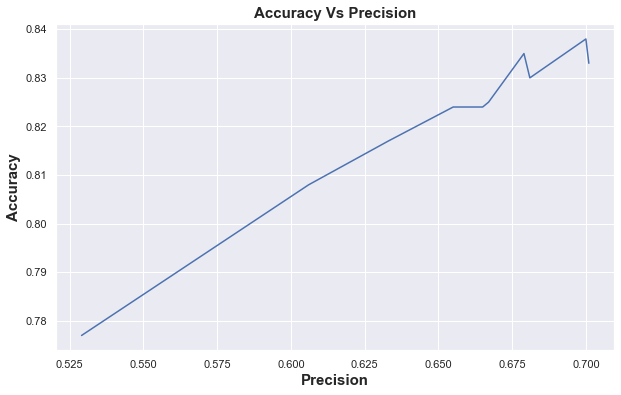

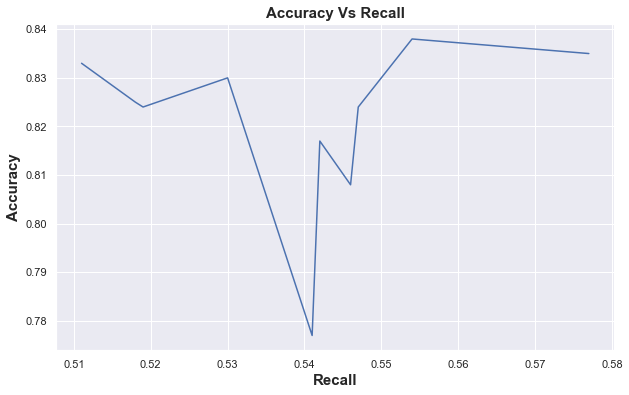

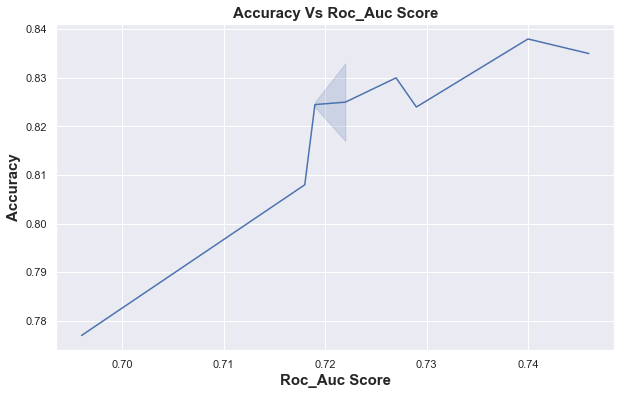

In [31]:
### Accuracy vs Precision and Recall
for feature1 in ['Accuracy']:
    for feature2 in ['Precision', 'Recall', 'Roc_Auc Score']:
        plt.figure(figsize=(10,6))
        sns.lineplot(y=feature1, x=feature2, data=model_perf)
        plt.xlabel("{}".format(feature2), fontweight='bold', fontsize=15)
        plt.ylabel("{}".format(feature1), fontweight='bold', fontsize=15)
        plt.title("{} Vs {}".format(feature1, feature2), fontweight='bold', fontsize=15)

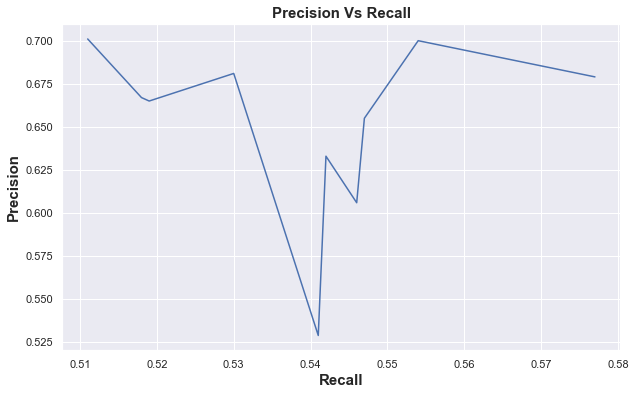

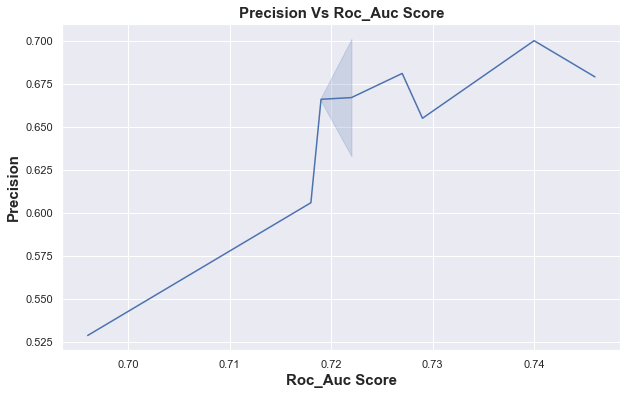

In [33]:
### Precision vs Recall and Roc_Auc Score
for feature1 in ['Precision']:
    for feature2 in [ 'Recall','Roc_Auc Score' ]:
        plt.figure(figsize=(10,6))
        sns.lineplot(y=feature1, x=feature2, data=model_perf)
        plt.xlabel("{}".format(feature2), fontweight='bold', fontsize=15)
        plt.ylabel("{}".format(feature1), fontweight='bold', fontsize=15)
        plt.title("{} Vs {}".format(feature1, feature2), fontweight='bold', fontsize=15)